## INDEX

- [SCRAPING](#SCRAPING)

- [DATA CLEANING](#DATA-CLEANING)

- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
  - [Missing Data](#missing-data)
  - [Summary statistics](#Summary-statistics)
  - [Address Length Distribution](#address-length-distribution)
  - [Email and Website Top level domains (TLD) Analysis](#email-and-website-top-level-domains-tld-analysis)
  - [Summary of Domains](#summary-of-domains)
  - [Companies using different (webiste and email) services with their names](#companies-using-different-webiste-and-email-services-with-their-names)
  - [Company names with their services they are using](#company-names-with-their-services-they-are-using)
  - [Number of Uniques TLDs used by both websites and email](#number-of-uniques-tlds-used-by-both-websites-and-email)
  - [Geographic Distribution of Companies](#geographic-distribution-of-companies)
  - [Address wordcloud](#address-wordcloud)
  - [Duplicate Phone number](#duplicate-phone-number)
  - [Top Cities with average address length](#top-cities-with-average-address-length)


## SCRAPING

Import the necessary libraries, requests for making HTTP requests and BeautifulSoup for parsing HTML.

Then, define the base_url as the starting point for web scraping.

Send an HTTP GET request to the base_url and retrieve the HTML content of the main page.

Using BeautifulSoup, I parse the HTML content.

Find all company entry elements on the main page using their div tags with the specified class name.

Iterating through each company entry:

find the company name element with an anchor tag (<a>) containing a link (href attribute).

get the URL of the company's page and send a request to the company's page and parse its HTML content.

find the "Daten und Kontakte" section on the company's page using its class name.

Within this section, we find and process contact information elements (<dd>) with the specified class.



Print a line of 40 dashes to separate entries for clarity.

In [ ]:
import requests
from bs4 import BeautifulSoup

base_url = "https://industrie.de/firmenverzeichnis/"

# Fetch the main page's HTML content
response = requests.get(base_url)
html_content = response.content

# Parse the HTML
soup = BeautifulSoup(html_content, "html.parser")

# Find all company entry elements
company_entries = soup.find_all("div", class_="infoservice-result-row") # class by inspecting the page on website

# Loop through each company entry
for entry in company_entries:
    company_name_element = entry.find("a", href=True)
    if company_name_element:
        company_name = company_name_element.get_text(strip=True)
        print("Company Name:", company_name)

        company_url = company_name_element["href"]
        company_response = requests.get(company_url)
        company_soup = BeautifulSoup(company_response.content, "html.parser")

        # Find the "Daten und Kontakte" section
        daten_kontakte_section = company_soup.find("div", class_="textwidget")  # class by inspecting the page on website

        if daten_kontakte_section:
            # Find and process contact information
            contact_info_elements = daten_kontakte_section.find_all("dd", class_="info-contact-data")
            for contact_info_element in contact_info_elements:
                contact_info = contact_info_element.get_text(strip=True)
                print(contact_info)
        # Print 40 "-" in between
        print("-" * 40)


Streaming output truncated to the last 5000 lines.
+49 8106-24210
+49 810629896
RUDERER KLEBETECHNIK GmbHHarthauser Str. 285604 ZornedingDeutschland
----------------------------------------
Company Name: Rudolf Geiger Maschinenbau GmbH
www.geiger-gmbh.de
info@geiger-gmbh.de
+49 9194-73770
+49 9194/7377-50
Rudolf Geiger Maschinenbau GmbHMilchgrube 291320 EbermannstadtDeutschland
----------------------------------------
Company Name: Rudolf Koose
r-koose@t-online.de
+49 2304-89652
+49 2304-89679
Rudolf KooseFeldmark 344267 DortmundDeutschland
----------------------------------------
Company Name: Ruhr Universität Bochum
www.ruhr-uni-bochum.de
wiwi-dekanant@ruhr-uni-bochum.de
+49 234-32-201
+49 234/32-14201
Ruhr Universität Bochum44780 BochumDeutschland
----------------------------------------
Company Name: Ruhrgetriebe KG H. Pferdmenges
ruhrgetriebe.de
info@ruhrgetriebe.de
+49 208-78068-0
+49 208498000
Ruhrgetriebe KG H. PferdmengesAm Förderturm 2945472 MülheimDeutschland
---------------

Distribution of the number of contact information data points available for each company

Import the matplotlib.pyplot library for creating data visualizations.

Initialize an empty list called contact_info_counts to store counts of contact information data points for each company.

Loop through each company entry:
extract the URL of the company's page.
Send an HTTP GET request to the company's page and parse its HTML content.
Find the "Daten und Kontakte" section on the company's page.
Locate and count contact information elements within that section.
Add the count to the contact_info_counts list.
After processing all companies, we create a bar plot.


The resulting bar plot visually represents how many contact information data points each company has, helping to analyze the distribution of contact information in the dataset.

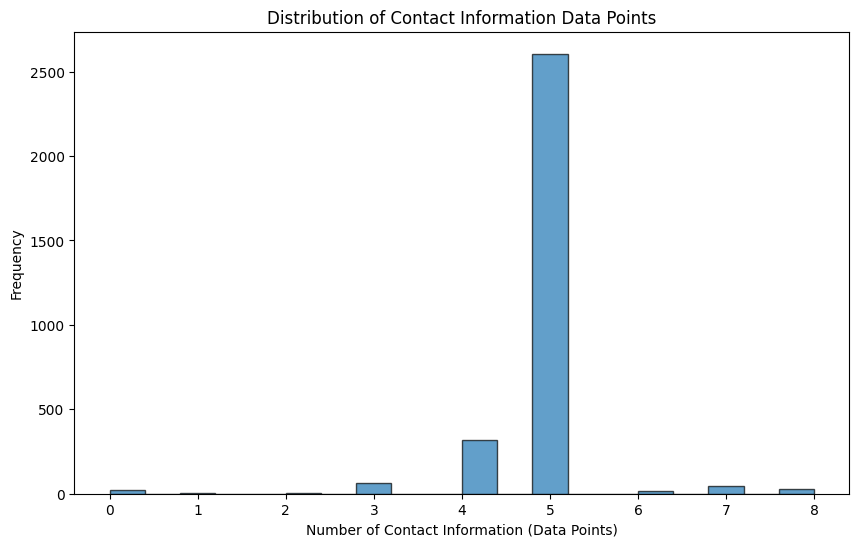

In [ ]:
import requests
from bs4 import BeautifulSoup

base_url = "https://industrie.de/firmenverzeichnis/"

# Fetch the main page's HTML content
response = requests.get(base_url)
html_content = response.content

# Parse the HTML
soup = BeautifulSoup(html_content, "html.parser")

# Find all company entry elements
company_entries = soup.find_all("div", class_="infoservice-result-row") # class by inspecting the page on website
# Initialize a list to store the counts of available contact information data points
contact_info_counts = []

# Loop through each company entry
for entry in company_entries:
    company_link = entry.find("a", href=True)
    if company_link:
        # Extract the URL of the company's page
        company_url = company_link["href"]
        company_response = requests.get(company_url)
        company_soup = BeautifulSoup(company_response.content, "html.parser")

        # Find the "Daten und Kontakte" section on the company's page
        daten_kontakte_section = company_soup.find("div", class_="textwidget")

        if daten_kontakte_section:
            # Find and process contact information elements
            contact_info_elements = daten_kontakte_section.find_all("dd", class_="info-contact-data")
            # Count the number of contact information data points
            contact_info_count = len(contact_info_elements)
            contact_info_counts.append(contact_info_count)

# Create a bar plot to visualize the distribution of contact information data points
plt.figure(figsize=(10, 6))
plt.hist(contact_info_counts, bins=20, edgecolor="k", alpha=0.7)
plt.xlabel("Number of Contact Information (Data Points)")
plt.ylabel("Frequency")
plt.title("Distribution of Contact Information Data Points")
plt.show()


## DATA CLEANING

Summary of Approach:

Data Storage: Create empty lists to store different types of company data, such as company names, websites, emails, phones, faxes, and addresses.

Main Loop:
Loop through each company entry on the main page.
Extract the company's name, URL, and send an HTTP GET request to the company's page.
Parse the company's page with BeautifulSoup.
Find the "Daten und Kontakte" section on the page.
Extract and process contact information elements, storing them in a list.
Split and handle contact information (website, email, phone, fax, address).
Append the extracted data to their respective lists.
Data Organization: After processing all companies, create a structured DataFrame (df) from the collected data. This DataFrame organizes the company data into a tabular format.

Data Export: Save the DataFrame to a CSV file named "cleaned_data_final.csv" without including the index.

Summary of Challenges Encountered:

Website Structure: Understanding and navigating the website's structure.

Data Consistency: Dealing with inconsistent data, including missing or incomplete contact information.

Data Extraction: Accurately identifying and parsing HTML elements to extract specific data.

Data Cleaning: Handling missing values as many companies had multiple missing values.

Data Quality: Ensuring data accuracy and quality to prevent errors or inaccuracies in analysis.

split the contact information into separate fields, clean phone numbers, and handle missing values.

In [ ]:
import re
import pandas as pd

# Create empty lists to store data
company_names = []
websites = []
emails = []
phones = []
faxes = []
addresses = []

# Loop through each company entry
for entry in company_entries:
    company_name_element = entry.find("a", href=True)
    company_name = company_name_element.get_text(strip=True) if company_name_element else "N/A"

    if company_name_element:
        company_url = company_name_element["href"]
        company_response = requests.get(company_url)
        company_soup = BeautifulSoup(company_response.content, "html.parser")

        # Find the "Daten und Kontakte" section
        daten_kontakte_section = company_soup.find("div", class_="textwidget")

        if daten_kontakte_section:
            # Find and process contact information
            contact_info_elements = daten_kontakte_section.find_all("dd", class_="info-contact-data")
            contact_info_list = [contact_info_element.get_text(strip=True) for contact_info_element in contact_info_elements]

            # Splitting contact information and handling missing values
            # taking values 0 to 4 because of my upper evaluation of data as almost every company has 5 data points in contact info
            website = contact_info_list[0] if len(contact_info_list) > 0 else "N/A"
            email = contact_info_list[1] if len(contact_info_list) > 1 else "N/A"
            phone = re.sub(r'\D', '', contact_info_list[2]) if len(contact_info_list) > 2 else "N/A"
            fax = re.sub(r'\D', '', contact_info_list[3]) if len(contact_info_list) > 3 else "N/A"
            address = contact_info_list[4] if len(contact_info_list) > 4 else "N/A"

            # Append data to lists
            company_names.append(company_name)
            websites.append(website)
            emails.append(email)
            phones.append(phone)
            faxes.append(fax)
            addresses.append(address)

# Create a DataFrame from the collected data
data = {
    "Company Name": company_names,
    "Website": websites,
    "Email": emails,
    "Phone": phones,
    "Fax": faxes,
    "Address": addresses
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("cleaned_data_final.csv", index=False)


Loading cleaned CSV Data

In [ ]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = "cleaned_data_final.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)


In [ ]:
# Print basic information about the DataFrame
print(df.info())

# Print summary statistics for numerical columns
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  3036 non-null   object 
 1   Website       3103 non-null   object 
 2   Email         3097 non-null   object 
 3   Phone         3093 non-null   float64
 4   Fax           3028 non-null   float64
 5   Address       2708 non-null   object 
dtypes: float64(2), object(4)
memory usage: 146.8+ KB
None
                              Company Name             Website  \
count                                 3036                3103   
unique                                3024                3023   
top     HALLESCHE Krankenversicherung a.G.  www.atlascopco.com   
freq                                     2                   3   
mean                                   NaN                 NaN   
std                                    NaN                 NaN   
min                          

The code aims to improve data consistency and reliability by addressing inconsistencies and missing values in the CSV file.


Data Cleaning:

Fills missing values in the 'Company Name' column with 'N/A' to ensure that every company has a name.

Email Column Cleanup:

Identifies email entries that contain numbers and fills them with 'N/A' to handle inconsistencies.

General Missing Value Handling:

Fills missing values in all other columns with 'N/A' to ensure uniformity.

In [ ]:
import pandas as pd
import re

# Specify the path to your CSV file
csv_file_path = "cleaned_data_final.csv"  # Replace with the path to your CSV file

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Fill 'N/A' in 'Company Name' where it's blank
df['Company Name'].fillna('N/A', inplace=True)

# Fill 'N/A' in 'Email' where there are numbers, but keep existing 'N/A'
def fill_na_in_email(row):
    if pd.notna(row['Email']) and re.search(r'\d', str(row['Email'])):
        row['Email'] = 'N/A'
    return row
# Fill 'N/A' in all columns where it's blank
df.fillna('N/A', inplace=True)

# Apply the transformation to the DataFrame
df = df.apply(fill_na_in_email, axis=1)

# Save the updated DataFrame to a new CSV file
updated_csv_file_path = "updated_data.csv"  # Specify the path for the updated CSV file
df.to_csv(updated_csv_file_path, index=False)

# Display the updated DataFrame
print(df)


                              Company Name                Website  \
0                      Beschaffung aktuell    Beschaffung aktuell   
1            1zu1 Prototypen GmbH & Co. KG                    N/A   
2            2 E mechatronic GmbH & Co. KG  www.2e-mechatronic.de   
3                 3D Global Solutions GmbH                3dgs.eu   
4     3D Systems GmbH Deutschland-Zentrale      www.3dsystems.com   
...                                    ...                    ...   
3123                    Zürcher-Technik AG        www.zuercher.ch   
3124                    ZVEI-Services GmbH   www.zvei-services.de   
3125                      ZVO Service GmbH            www.zvo.org   
3126                  Zwick Armaturen GmbH      www.zwick-gmbh.de   
3127              ZwickRoell GmbH & Co. KG           www.zwick.de   

                     Email            Phone              Fax  \
0                      N/A              N/A              N/A   
1                      N/A              N/A

## Exploratory Data Analysis (EDA)

### Missing Data

Data Completeness Analysis: Identifies missing values in the dataset, providing an overview of data completeness.

Missing Data Patterns: Missing values indicating potential data quality issues, highlighting areas where data may be incomplete and inconsistent. It helps identify patterns in trends in missing data distribution, aiding in decision-making about data handling strategies.
The dataset contains missing data in various columns. Notably, the 'Address' column has a significant number of missing values, making up approximately 13% of the data.

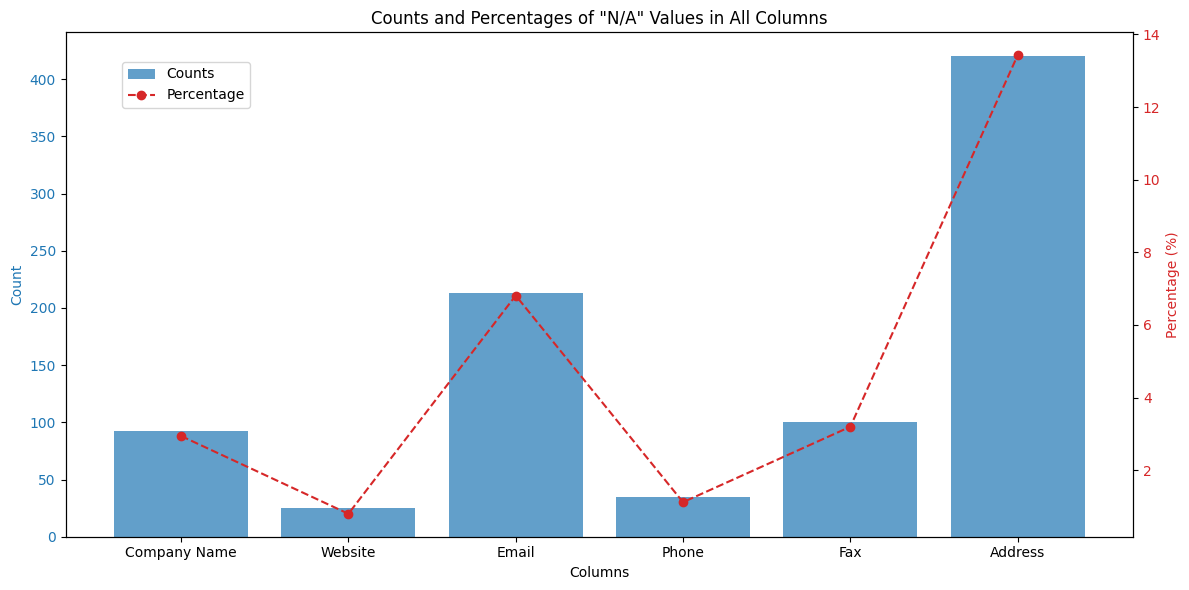

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your updated CSV file
updated_csv_file_path = "updated_data.csv"

# Load the updated CSV file into a DataFrame
df_updated = pd.read_csv(updated_csv_file_path)

# Count the 'N/A' values in each column for all rows
na_counts_all_columns_updated = df_updated.isna().sum()

# Calculate the percentage of 'N/A' values for each column, give insights of missing values in data
total_rows = len(df_updated)
na_percentage_all_columns_updated = (na_counts_all_columns_updated / total_rows) * 100

# Create a bar chart with counts and percentages
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot counts
color = 'tab:blue'
ax1.bar(na_counts_all_columns_updated.index, na_counts_all_columns_updated, color=color, alpha=0.7, label='Counts')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Count', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for percentages
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(na_counts_all_columns_updated.index, na_percentage_all_columns_updated, marker='o', color=color, label='Percentage', linestyle='--')
ax2.set_ylabel('Percentage (%)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and labels
plt.title('Counts and Percentages of "N/A" Values in All Columns')
fig.tight_layout()

# Display legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# Calculate summary statistics for counts
count_summary = na_counts_all_columns_updated.describe()

# Calculate summary statistics for percentages
percentage_summary = na_percentage_all_columns_updated.describe()

# Print the count summary
print("Count Summary:")
print(count_summary)

# Print the percentage summary
print("\nPercentage Summary:")
print(percentage_summary)


Count Summary:
count      6.000000
mean     147.500000
std      149.362311
min       25.000000
25%       49.250000
50%       96.000000
75%      184.750000
max      420.000000
dtype: float64

Percentage Summary:
count     6.000000
mean      4.715473
std       4.775010
min       0.799233
25%       1.574488
50%       3.069054
75%       5.906330
max      13.427110
dtype: float64


### Summary statistics

Count: There are 3,128 phone numbers in the dataset. This confirms the dataset's size and the number of phone numbers available for analysis.

Mean: The average phone number length is approximately 12.89 digits. This gives an idea of the typical length of phone numbers in the dataset.

Std (Standard Deviation): The standard deviation is approximately 1.75. It indicates the spread or variability in phone number lengths. A higher standard deviation suggests more variation in phone number lengths.

Min (Minimum): The shortest phone number in the dataset has 3 digits. This suggests that some phone numbers might be exceptionally short or possibly contain errors.

25th Percentile (Q1): 25% of phone numbers have a length of 12 digits or less. This provides insight into the distribution of shorter phone numbers.

50th Percentile (Median): The median phone number length is 13 digits. This is the midpoint of the dataset, indicating that half of the phone numbers are shorter than 13 digits and half are longer.

75th Percentile (Q3): 75% of phone numbers have a length of 14 digits or less. This offers additional information about the distribution of phone number lengths, specifically the longer ones.

Max (Maximum): The longest phone number in the dataset has 22 digits. This highlights the presence of exceptionally long phone numbers, which might require further investigation.



In [ ]:
# Calculate phone number lengths and add a new column to the DataFrame
df_updated["Phone Length"] = df_updated["Phone"].apply(lambda x: len(str(x)))

# Print summary statistics of phone number lengths
print("Summary Statistics of Phone Number Lengths:")
print(df_updated["Phone Length"].describe())

Summary Statistics of Phone Number Lengths:
count    3128.000000
mean       12.889066
std         1.754022
min         3.000000
25%        12.000000
50%        13.000000
75%        14.000000
max        22.000000
Name: Phone Length, dtype: float64


### Address Length Distribution


Address Length Distribution: The histogram shows that the majority of addresses fall within the range of 2 to 77 characters. This suggests that most companies have relatively concise addresses, but there are some with longer addresses.

Outliers: Addresses longer than 77 characters are less common but exist in the dataset. Investigating these longer addresses could reveal whether they are valid or outliers that require further validation.

Addresses with Similar Lengths: Addresses with lengths between 50 and 77 characters make up a significant portion of the dataset. Further analysis could explore whether there are patterns or common elements among these addresses that might be of interest.

Data Cleansing: For data quality purposes,  addresses at the extreme ends of the distribution (very short or very long) shows they are not correctly formatted and valid.


Overall, this analysis gives an understanding of the distribution of address lengths in your dataset, which is valuable for data quality assessment and potential feature engineering in future analyses.

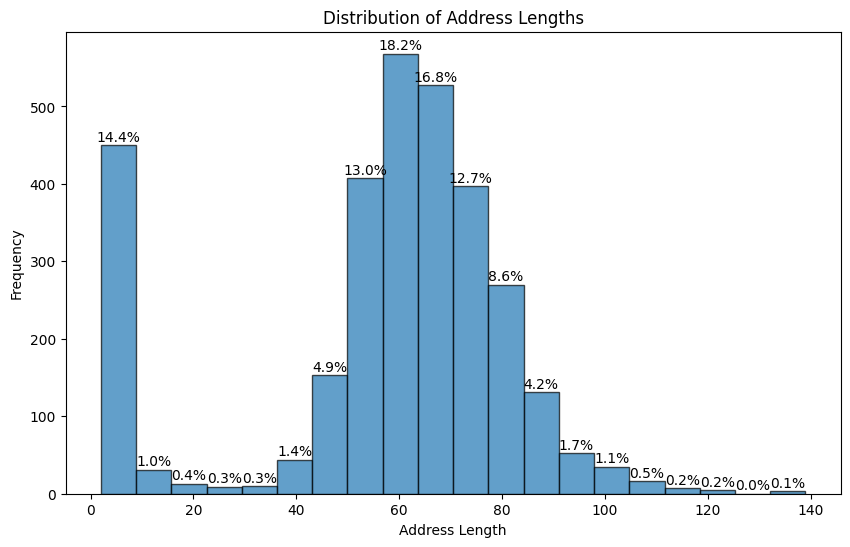

Summary Statistics of Address Lengths:
count    3128.000000
mean       56.643223
std        26.065953
min         2.000000
25%        51.000000
50%        62.000000
75%        73.000000
max       139.000000
Name: Address Length, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your updated CSV file
updated_csv_file_path = "updated_data.csv"

# Load the updated CSV file into a DataFrame
df_updated = pd.read_csv(updated_csv_file_path)

# Calculate address lengths and add a new column to the DataFrame
df_updated["Address Length"] = df_updated["Address"].apply(lambda x: len(str(x)))

# Print summary statistics of address lengths
address_length_summary = df_updated["Address Length"].describe()

# Create a histogram to visualize the distribution of address lengths
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_updated["Address Length"], bins=20, edgecolor="k", alpha=0.7)
plt.xlabel("Address Length")
plt.ylabel("Frequency")
plt.title("Distribution of Address Lengths")

# Add text labels for percentage
total_addresses = len(df_updated)
for patch, count in zip(patches, n):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    percentage = (count / total_addresses) * 100
    plt.text(x, y + 5, f"{percentage:.1f}%", ha="center") #percentage of addresses falling within specific length ranges.

plt.show()

# Print summary statistics
print("Summary Statistics of Address Lengths:")
print(address_length_summary)


### Email and Website Top level domains (TLD) Analysis


The exploratory data analysis (EDA) of the email and website Top Level Domains(TLD) can provide insights into the types of services or industries that companies may be associated with based on their email and website domains.
Frequency Distribution Analysis: The statistics reveal the frequency distribution of the top 10 website postfixes, helping to identify the most common ones and their prevalence.

Data Profiling: This analysis contributes to data profiling by highlighting the characteristics of the most frequent website Top Level Domains(TLD) in the dataset.

Segmentation or Categorization: The counts of top Top Level Domains(TLD) inform decisions about categorizing or segmenting companies based on their domain types.
Most of the records in the dataset have TLDs associated with Germany ("de") and generic domains like ".com." This suggests that a significant portion of the data may be related to German-based companies or entities.

Data Enrichment: Knowledge of the most common Top Level Domains(TLD) is useful for data enrichment or validation purposes, such as verifying domain types.

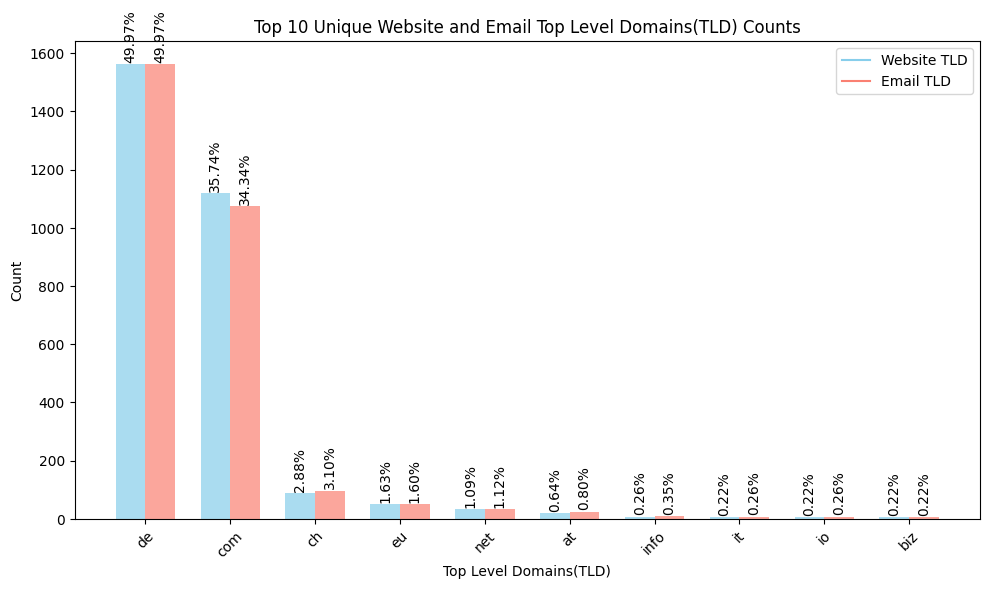

In [ ]:
# Load the updated CSV file into a DataFrame
df_updated = pd.read_csv(updated_csv_file_path)

# Create subplots with two rows and one column
fig, ax1 = plt.subplots(figsize=(10, 6))

# Extract the website Top Level Domains(TLD) from the "Website" column
website_TLD = df_updated["Website"].str.extract(r'\.(\w+)$')

# Count the unique website Top Level Domains(TLD)
unique_website_TLD_counts = website_TLD[0].value_counts()

# Select the top 10 unique website Top Level Domains(TLD)
top_10_website_TLD = unique_website_TLD_counts.head(10)

# Calculate the total number of website Top Level Domains(TLD)
total_website_TLD = len(website_TLD)

# Calculate the percentage of each Top Level Domains(TLD) from the total
website_TLD_percentages = (top_10_website_TLD / total_website_TLD) * 100

# Extract the email Top Level Domains(TLD) from the "Email" column
email_TLD = df_updated["Email"].str.extract(r'(.\w+)$')

# Count the unique email Top Level Domains(TLD)
unique_email_TLD_counts = email_TLD[0].value_counts()

# Select the top 10 unique email Top Level Domains(TLD)
top_10_email_TLD = unique_email_TLD_counts.head(10)

# Calculate the total number of email Top Level Domains(TLD)
total_email_TLD = len(email_TLD)

# Calculate the percentage of each Top Level Domains(TLD) from the total
email_TLD_percentages = (top_10_email_TLD / total_email_TLD) * 100

# Create a bar plot for both website TLD and email TLD in the same subplot
bar_width = 0.35
index = range(len(top_10_website_TLD))
bars1 = plt.bar(index, top_10_website_TLD, bar_width, label='Website TLD', color='skyblue', alpha=0.7)
bars2 = plt.bar([i + bar_width for i in index], top_10_email_TLD, bar_width, label='Email TLD', color='salmon', alpha=0.7)
plt.xlabel('Top Level Domains(TLD)')
plt.ylabel('Count')
plt.title('Top 10 Unique Website and Email Top Level Domains(TLD) Counts')
plt.xticks([i + bar_width / 2 for i in index], top_10_website_TLD.index, rotation=45)

# Display percentage text on top of each bar vertically
for i, (website_label, email_label) in enumerate(zip(top_10_website_TLD.index, top_10_email_TLD.index)):
    height1, height2 = top_10_website_TLD[website_label], top_10_email_TLD[email_label]
    x1, x2 = bars1[i].get_x() + bars1[i].get_width() / 2, bars2[i].get_x() + bars2[i].get_width() / 2
    percentage1, percentage2 = website_TLD_percentages[website_label], email_TLD_percentages[email_label]

    plt.text(x1, height1 + 5, f'{percentage1:.2f}%', ha='center', va='bottom', fontsize=10, rotation=90)
    plt.text(x2, height2 + 5, f'{percentage2:.2f}%', ha='center', va='bottom', fontsize=10, rotation=90)

# Create a custom legend
legend_labels = ['Website TLD', 'Email TLD']
plt.legend(handles=[plt.Line2D([], [], color='skyblue', label=legend_labels[0]),
                    plt.Line2D([], [], color='salmon', label=legend_labels[1])],
           loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()




### Summary of Domains

In [ ]:
# Calculate the total number of records in the DataFrame
total_records = len(df_updated)

# Calculate the total number of unique website TLDs
total_website_TLDs = len(unique_website_TLD_counts)

# Calculate the total number of unique email TLDs
total_email_TLDs = len(unique_email_TLD_counts)

# Print the summary
print("Data Analysis Summary:")
print(f"Total Number of Records: {total_records}")
print(f"Total Number of Unique Website Top Level Domains (TLDs): {total_website_TLDs}")
print(f"Total Number of Unique Email Top Level Domains (TLDs): {total_email_TLDs}")

# Print the top 10 Website TLDs with counts and percentages
print("\nTop 10 Website Top Level Domains (TLDs):")
for website_label in top_10_website_TLD.index:
    count = top_10_website_TLD[website_label]
    percentage = website_TLD_percentages[website_label]
    print(f"{website_label}: Count: {count}, Percentage: {percentage:.2f}%")

# Print the top 10 Email TLDs with counts and percentages
print("\nTop 10 Email Top Level Domains (TLDs):")
for email_label in top_10_email_TLD.index:
    count = top_10_email_TLD[email_label]
    percentage = email_TLD_percentages[email_label]
    print(f"{email_label}: Count: {count}, Percentage: {percentage:.2f}%")


Data Analysis Summary:
Total Number of Records: 3128
Total Number of Unique Website Top Level Domains (TLDs): 36
Total Number of Unique Email Top Level Domains (TLDs): 32

Top 10 Website Top Level Domains (TLDs):
de: Count: 1563, Percentage: 49.97%
com: Count: 1118, Percentage: 35.74%
ch: Count: 90, Percentage: 2.88%
eu: Count: 51, Percentage: 1.63%
net: Count: 34, Percentage: 1.09%
at: Count: 20, Percentage: 0.64%
info: Count: 8, Percentage: 0.26%
it: Count: 7, Percentage: 0.22%
io: Count: 7, Percentage: 0.22%
biz: Count: 7, Percentage: 0.22%

Top 10 Email Top Level Domains (TLDs):
.de: Count: 1563, Percentage: 49.97%
.com: Count: 1074, Percentage: 34.34%
.ch: Count: 97, Percentage: 3.10%
.eu: Count: 50, Percentage: 1.60%
.net: Count: 35, Percentage: 1.12%
.at: Count: 25, Percentage: 0.80%
.info: Count: 11, Percentage: 0.35%
.org: Count: 8, Percentage: 0.26%
.io: Count: 8, Percentage: 0.26%
.it: Count: 7, Percentage: 0.22%


### Companies using different (webiste and email) services with their names

Data Consistency Analysis: This analysis helps identify cases where the email and website postfixes do not match, which could indicate data inconsistencies or errors.

Data Validation: It highlights instances that may require validation or correction to ensure data accuracy and consistency.

Data Profiling: Identifying and reporting mismatched postfixes is a part of data profiling, providing insights into data quality.

Data Cleaning: The information can guide data cleaning efforts to address the mismatched cases and maintain data integrity.

In [ ]:
# Extract the email postfixes from the "Email" column
email_postfixes = df_updated["Email"].str.extract(r'(\.\w+)$')

# Extract the website postfixes from the "Website" column
website_postfixes = df_updated["Website"].str.extract(r'(\.\w+)$')

# Create a DataFrame with company names, email postfixes, and website postfixes
company_postfixes_df = pd.DataFrame({
    "Company Name": df_updated["Company Name"],
    "Email Postfix": email_postfixes[0],
    "Website Postfix": website_postfixes[0]
})

# Filter rows where the email and website postfixes don't match
mismatched_postfixes = company_postfixes_df[company_postfixes_df["Email Postfix"] != company_postfixes_df["Website Postfix"]]

# Print the mismatched company names and count
print("Company Names with Mismatched Postfixes:")
print(mismatched_postfixes["Company Name"].values)
print("\nTotal Count:", len(mismatched_postfixes))


Company Names with Mismatched Postfixes:
['Beschaffung aktuell' '1zu1 Prototypen GmbH & Co. KG'
 '2 E mechatronic GmbH & Co. KG' '3D Global Solutions GmbH'
 '3D Systems GmbH Deutschland-Zentrale' '3D-Laserdruck GbR'
 '3Dconnexion GmbH' '3P INSTRUMENTS GmbH & Co. KG' '3plusplus GmbH'
 '3YOURMIND GmbH' 'A.T. Kearney GmbH' 'A1 Digital Deutschland GmbH'
 'A1 Digital International GmbH' 'a3Ds GmbH automated 3D scanning'
 'abas Software GmbH' 'ABB AG Division Robotics'
 'ABB Automation Products GmbH Motors & Drives' 'ABB Schweiz AG'
 'ABB Stotz-Kontakt GmbH' 'Abnox AG' 'ABUS August Bremicker Söhne KG'
 'ACCIO Catalonia Trade & Investment' 'ADDI-DATA GmbH' nan
 'Adobe Systems GmbH' 'ADVANTECH Europe BV Zweigndl. Deutschland'
 'Advantest Europe GmbH' 'Aerotech GmbH Elektronische Steuerungen'
 'AFRISO-EURO-INDEX GmbH' 'Alfa Laval Mid Europe GmbH'
 'Alfred Kärcher Vertriebs-GmbH' 'Allgaier Prologis GmbH'
 'Allgaier Werke GmbH' 'Allied Vision Technologies GmbH'
 'Althen GmbH Mess- und Sensortechn

### Company names with their services they are using




Detailed Information: Printing the mismatched company names and their postfix differences allows for a more detailed examination of data inconsistencies.

Data Validation: Stakeholders can use this information to validate and rectify discrepancies between email and website postfixes.

Data Quality Assessment: The presentation of specific cases aids in assessing data quality and identifying areas that may require attention.

Data Cleaning Guidance: Provides insights into where data cleaning or correction efforts should be focused to maintain data integrity.

In [ ]:
# Print the mismatched company names and their postfix differences
for index, row in mismatched_postfixes.iterrows():
    print("Company Name:", row["Company Name"])
    print("Email Postfix:", row["Email Postfix"])
    print("Website Postfix:", row["Website Postfix"])
    print("-" * 40)

# Print the total count of mismatched postfixes
print("\nTotal Count:", len(mismatched_postfixes))


Company Name: Beschaffung aktuell
Email Postfix: nan
Website Postfix: nan
----------------------------------------
Company Name: 1zu1 Prototypen GmbH & Co. KG
Email Postfix: nan
Website Postfix: nan
----------------------------------------
Company Name: 2 E mechatronic GmbH & Co. KG
Email Postfix: nan
Website Postfix: .de
----------------------------------------
Company Name: 3D Global Solutions GmbH
Email Postfix: nan
Website Postfix: .eu
----------------------------------------
Company Name: 3D Systems GmbH Deutschland-Zentrale
Email Postfix: nan
Website Postfix: .com
----------------------------------------
Company Name: 3D-Laserdruck GbR
Email Postfix: nan
Website Postfix: .de
----------------------------------------
Company Name: 3Dconnexion GmbH
Email Postfix: nan
Website Postfix: .de
----------------------------------------
Company Name: 3P INSTRUMENTS GmbH & Co. KG
Email Postfix: nan
Website Postfix: .com
----------------------------------------
Company Name: 3plusplus GmbH
Ema

### Number of Uniques TLDs used by both websites and email

Visual Representation: The Venn diagram visually represents the distribution of TLDs between email and website domains.
Common TLDs: There are 27 TLDs common to both email and website domains, indicating shared TLD usage.
Domain-Specific TLDs: The diagram clearly shows that there are 5 unique TLDs used only in emails and 10 unique TLDs used only in websites.
Categorization: This information can be useful for categorization or segmentation based on domain types.
Data Profiling: The diagram contributes to data profiling by highlighting TLD characteristics in different domains.

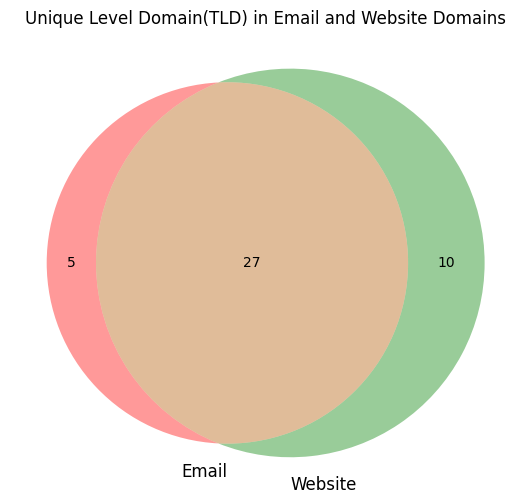

In [ ]:
from matplotlib_venn import venn2

# Extract the email Top Level Domain(TLD) from the "Email" column
email_TLD = df_updated["Email"].str.extract(r'(\.\w+)$')

# Extract the website Level Domain(TLD) from the "Website" column
website_TLD = df_updated["Website"].str.extract(r'(\.\w+)$')

# Create sets of unique email and website Level Domain(TLD)
unique_email_TLD = set(email_TLD[0].unique())
unique_website_TLD = set(website_TLD[0].unique())

# Find the Level Domain(TLD) that are unique to either emails or websites
email_unique_TLD = unique_email_TLD - unique_website_TLD
website_unique_TLD = unique_website_TLD - unique_email_TLD

# Create a Venn diagram to visualize the unique Level Domain(TLD)
plt.figure(figsize=(8, 6))
venn2([unique_email_TLD, unique_website_TLD], ('Email', 'Website'))
plt.title('Unique Level Domain(TLD) in Email and Website Domains')
plt.show()


### Geographic Distribution of Companies


Number of Cities where frequency shows the number of companies in that city and it gives a good idea about the city's infrastructure and development.
It give insights into the geographic locations where business contacts or data entries are concentrated.

City Distribution: The analysis reveals the distribution of cities in the dataset, highlighting the cities with most companies.

Location Insights: Knowledge of the top cities provides location-based insights into the data, which may be useful for segmentation or analysis.

Data Profiling: This analysis contributes to data profiling by characterizing the distribution of cities, a key attribute in datasets.

Geographic Analysis: Location is relevant to the analysis, this information can guide geographic-focused investigations and development focus of government.

Munich emerges as a major business hub, with a substantial number of companies compared to other cities in the dataset. While Munich dominates, Berlin and Hamburg also play crucial roles, indicating high levels of development in these areas.

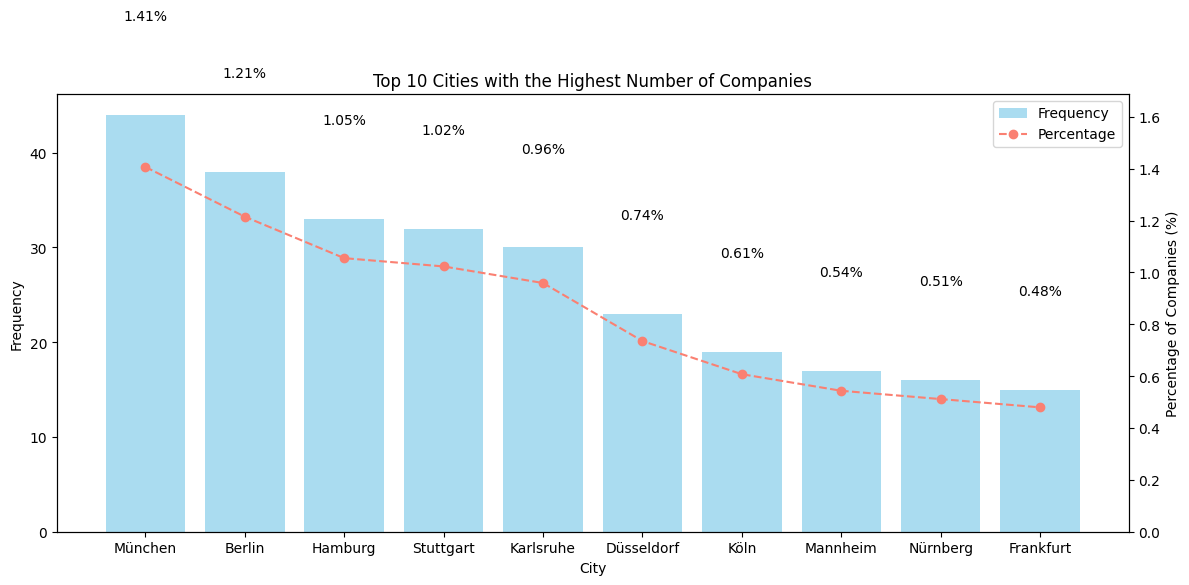

In [ ]:
# Extract city and postal code from the "Address" column
df_updated["City"] = df_updated["Address"].str.replace("Deutschland", "").str.extract(r'(\d{5}) (\D+)')[1]

# Count the occurrences of each city
city_counts = df_updated["City"].value_counts().head(10)

# Calculate the total number of companies
total_companies = len(df_updated)

# Calculate the percentage of companies in each city
city_percentages = (city_counts / total_companies) * 100

# Create a figure with two subplots (bars and dashed lines)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for frequencies
bars = ax1.bar(city_counts.index, city_counts, color='skyblue', alpha=0.7, label='Frequency')

ax1.set_xlabel('City')
ax1.set_ylabel('Frequency')
ax1.set_title('Top 10 Cities with the Highest Number of Companies')

# Dashed line chart for percentages
ax2 = ax1.twinx()
ax2.plot(city_percentages.index, city_percentages, linestyle='--', color='salmon', marker='o', label='Percentage')

ax2.set_ylabel('Percentage of Companies (%)')
ax2.set_ylim(0, max(city_percentages) * 1.2)  # Adjust the y-axis limit for dashed line visibility

# Display legend for both charts
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Display percentage text on top of each bar with adjusted position
for city, frequency, percentage in zip(city_counts.index, city_counts, city_percentages):
    ax1.text(city, frequency + 10, f'{percentage:.2f}%', ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### Address wordcloud


This code generates a word cloud to visualize the most frequent terms in the addresses,
providing insights into common locations within the dataset as part of the EDA process.
Visual Representation: The word cloud provides a visual representation of the most frequent words (in this case, components of addresses) in the dataset.
Address Components: It helped identify common components within addresses.
Data Understanding: The word cloud aids in understanding the prevalence of specific address elements and patterns within the dataset.

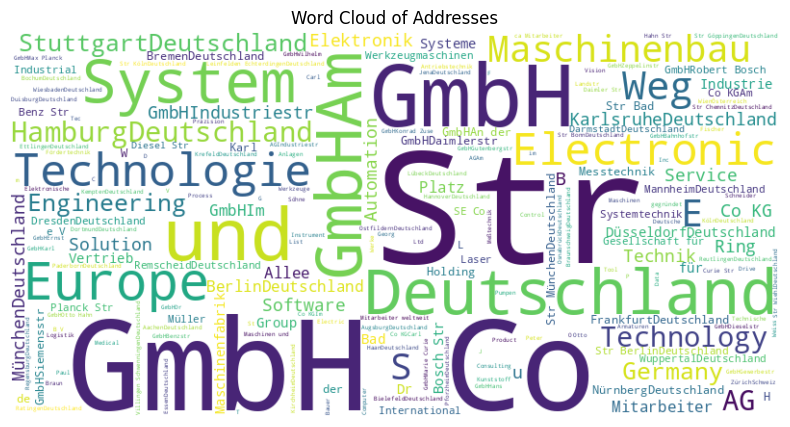

In [ ]:
from wordcloud import WordCloud

# Combine all addresses into a single string
addresses = " ".join(df_updated["Address"].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(addresses)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Addresses")
plt.show()


### Duplicate Phone number

The code calculate and display the percentage of each duplicate phone number relative to the total number of duplicates.

Data Quality Issues: The presence of phone numbers like "4.971150e+12" and "4.900000e+01" suggests potential data quality issues. These numbers might not represent valid or meaningful phone numbers.
There are 496 instances of duplicate phone numbers in the dataset, which suggests potential data quality issues or inconsistencies in the 'Phone' column.

The list of 'Company Name' values associated with duplicate phone numbers can be helpful for identifying companies that share the same phone contact.

In [25]:
from IPython.display import HTML

# Count the occurrences of each phone number in df_updated
phone_counts = df_updated['Phone'].value_counts()

# Filter for phone numbers with counts greater than 1 (duplicates)
duplicates = phone_counts[phone_counts > 1]

# Select the top 20 duplicate phone numbers
top_20_duplicates = duplicates.head(20)

# Calculate the total number of duplicate phone numbers
total_duplicates = top_20_duplicates.sum()

# Create a DataFrame to display the data
table_data = pd.DataFrame({'Phone Number': top_20_duplicates.index, 'Count': top_20_duplicates.values})

# Calculate and add percentages to the DataFrame
table_data['Percentage'] = (table_data['Count'] / total_duplicates) * 100

# Function to format phone numbers
def format_phone(phone_number):
    phone_str = str(int(phone_number))
    if '0' in phone_str and phone_str.count('0') >= 5:
        return f'<span style="color: red; background-color: yellow;">{phone_str}</span>'
    return phone_str

# Apply the format_phone function to the 'Phone Number' column
table_data['Phone Number'] = table_data['Phone Number'].apply(format_phone)

# Display the DataFrame as a styled table
styled_table = table_data.to_html(escape=False, render_links=True, index=False)

# Display the styled table as HTML
display(HTML(styled_table))


Phone Number,Count,Percentage
4971150000000,6,7.058824
49,6,7.058824
497113000000,5,5.882353
496197000000,5,5.882353
499132000000,5,5.882353
497117000000,5,5.882353
497022000000,5,5.882353
497118000000,4,4.705882
498932000000,4,4.705882
499120000000,4,4.705882


In [ ]:
# Count the occurrences of each phone number in df_updated
phone_counts = df_updated['Phone'].value_counts()

# Filter for phone numbers with counts greater than 1 (duplicates)
duplicates = phone_counts[phone_counts > 1]

# Calculate the total number of duplicate phone numbers
total_duplicate_numbers = len(duplicates)

# Calculate the total number of companies with duplicate phone numbers
total_companies_with_duplicates = duplicates.sum()

# Print the summary
print("Duplicate Phone Numbers Summary:")
print(f"Total Duplicate Phone Numbers: {total_duplicate_numbers}")
print(f"Total Companies with Duplicate Phone Numbers: {total_companies_with_duplicates}")

# Show the top 10 duplicate phone numbers as a table
top_10_duplicates = duplicates.head(10)
print("\nTop 10 Duplicate Phone Numbers:")
print(top_10_duplicates)


Duplicate Phone Numbers Summary:
Total Duplicate Phone Numbers: 198
Total Companies with Duplicate Phone Numbers: 461

Top 10 Duplicate Phone Numbers:
4.971150e+12    6
4.900000e+01    6
4.971130e+11    5
4.961970e+11    5
4.991320e+11    5
4.971170e+11    5
4.970220e+11    5
4.971180e+11    4
4.989320e+11    4
4.991200e+11    4
Name: Phone, dtype: int64


Number of Companies has duplicate numbers

### Top Cities with average address length

Bar plot showing the top 30 cities by frequency along with their average address length:

This plot offers insights into the relationship between the frequency of cities in the dataset and the average length of addresses associated with them.

Cities at the top have shorter average address lengths, while those at the bottom have longer average address lengths.

It helps identify cities with specific address formatting patterns, which can be useful for further analysis or decision-making

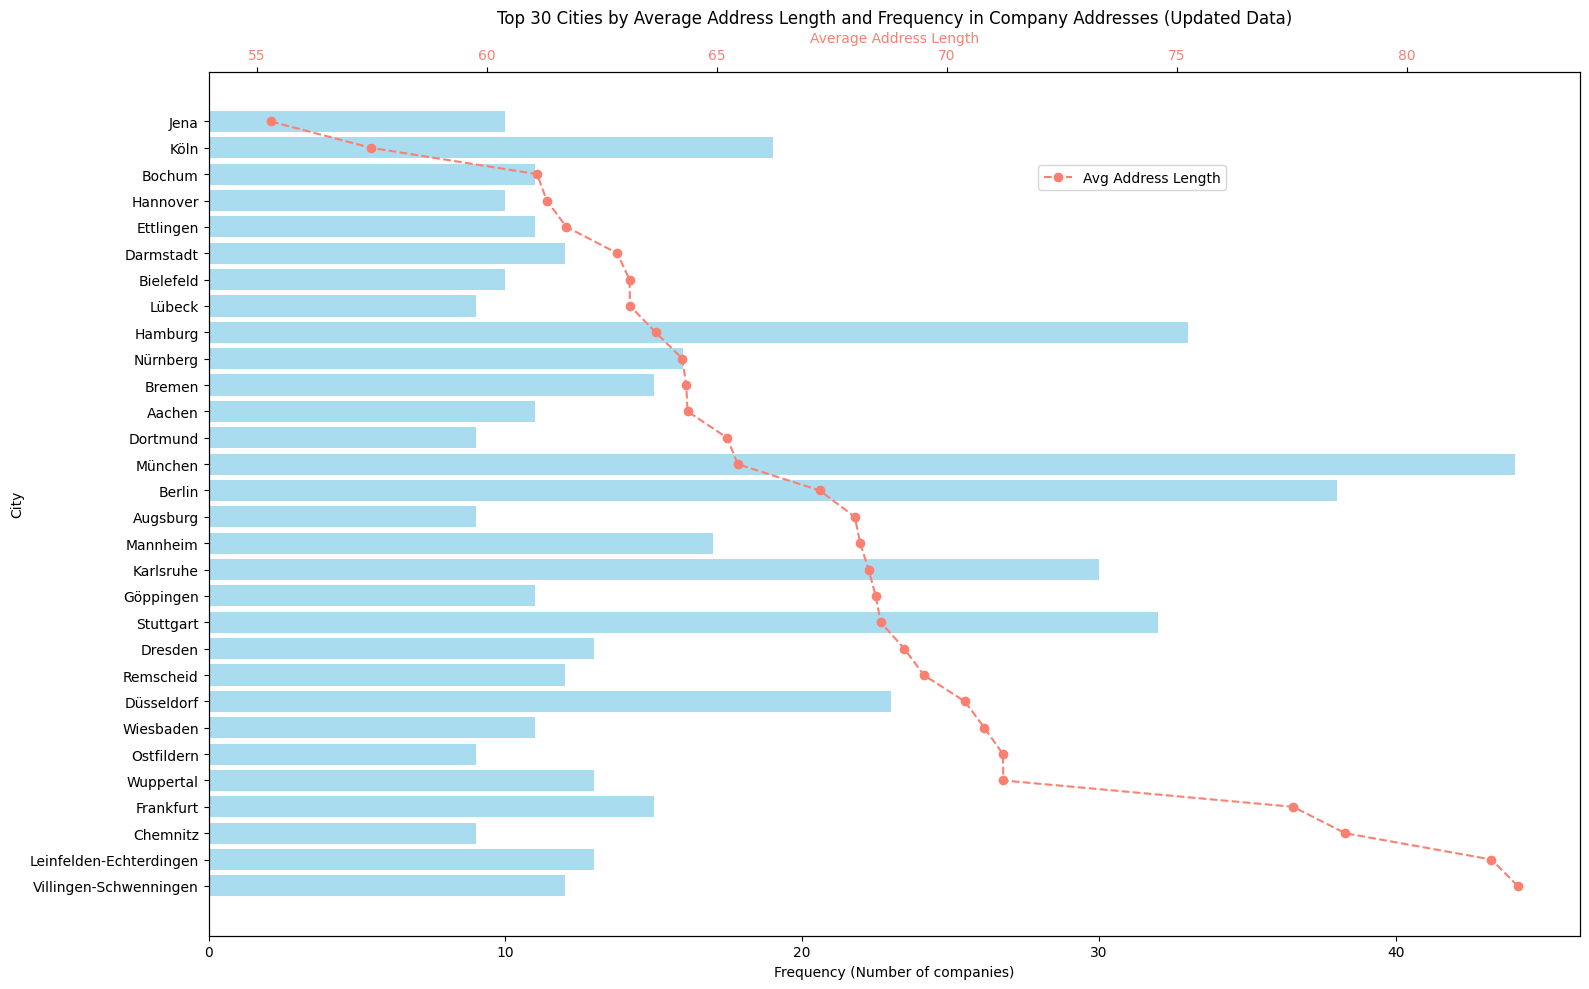

In [ ]:
# Load the updated CSV file into a DataFrame
df_updated = pd.read_csv(updated_csv_file_path)

# Extract city and postal code from the "Address" column
df_updated["City"] = df_updated["Address"].str.replace("Deutschland", "").str.extract(r'(\d{5}) (\D+)')[1]

# Count the occurrences of each city
city_counts = df_updated["City"].value_counts().reset_index()
city_counts.columns = ["City", "Frequency"]

# Sort cities by frequency in descending order and select the top 30
top_30_cities = city_counts.head(30)

# Calculate address lengths and add a new column to the DataFrame
df_updated["Address Length"] = df_updated["Address"].apply(lambda x: len(str(x)))

# Group by city and calculate the average address length for each city
city_avg_address_length = df_updated.groupby("City")["Address Length"].mean().reset_index()
city_avg_address_length.columns = ["City", "Avg Address Length"]

# Sort cities by average address length in ascending order
top_cities_with_length = pd.merge(top_30_cities, city_avg_address_length, on="City")
top_cities_with_length = top_cities_with_length.sort_values(by="Avg Address Length", ascending=True)

# Create a bar plot to visualize the top 30 cities by average address length
fig, ax1 = plt.subplots(figsize=(16, 10))

# Primary y-axis for frequency
ax1.barh(top_cities_with_length["City"], top_cities_with_length["Frequency"], color='skyblue', alpha=0.7)
ax1.set_xlabel('Frequency (Number of companies)')
ax1.set_ylabel('City')
ax1.set_title('Top 30 Cities by Average Address Length and Frequency in Company Addresses (Updated Data)')
ax1.invert_yaxis()  # Invert the y-axis to show the shortest address lengths at the top

# Secondary y-axis for average address length
ax2 = ax1.twiny()
ax2.plot(top_cities_with_length["Avg Address Length"], top_cities_with_length["City"], marker='o', color='salmon', label='Avg Address Length', linestyle='--')
ax2.set_xlabel('Average Address Length', color='salmon')
ax2.tick_params(axis='x', labelcolor='salmon')

# Display legend
ax2.legend(loc='upper left', bbox_to_anchor=(0.6, 0.9))

# Show the plot
plt.tight_layout()
plt.show()
